In [ ]:
# Exercise 1.

# Hint: use the file Data_Marketing_Customer_Analysis_Round3.csv

# One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).
# for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.

In [170]:
import pandas as pd 
import seaborn as sns

In [171]:
csv_path = '/Users/matthewbatchelor/Downloads/marketing_customer_analysis_clean.csv'

In [172]:
df = pd.read_csv(csv_path)

In [173]:
df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10910 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10910 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

In [175]:
# Numerical variables are

numericals_df = df.select_dtypes(include=['number'])

In [176]:
numericals_df

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [177]:
# Categorical variables are as follows: 

categoricals_df = df.select_dtypes(include=['object'])

In [178]:
categoricals_df

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,2011-01-17,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,2011-01-19,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,2011-01-06,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2011-02-06,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,A
10908,WA60547,California,No,Premium,College,2011-02-13,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [179]:
df["state"].unique() # nominal

array(['Arizona', 'California', 'Washington', 'Oregon', 'Nevada'],
      dtype=object)

In [180]:
df["response"].unique() # nominal 

array(['No', 'Yes'], dtype=object)

In [181]:
df["coverage"].unique() # ordinal 

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [182]:
df["education"].unique() # ordinal 

array(['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master'],
      dtype=object)

In [183]:
df["effective_to_date"].unique() # nominal 

array(['2011-02-18', '2011-01-18', '2011-02-10', '2011-01-11',
       '2011-01-17', '2011-02-14', '2011-02-24', '2011-01-19',
       '2011-01-04', '2011-01-02', '2011-02-07', '2011-01-31',
       '2011-01-26', '2011-02-28', '2011-01-16', '2011-02-26',
       '2011-02-23', '2011-01-15', '2011-02-02', '2011-02-15',
       '2011-01-24', '2011-02-21', '2011-02-22', '2011-01-07',
       '2011-01-28', '2011-02-08', '2011-02-12', '2011-02-20',
       '2011-01-05', '2011-02-19', '2011-01-03', '2011-02-03',
       '2011-01-22', '2011-01-23', '2011-02-05', '2011-02-13',
       '2011-01-25', '2011-02-16', '2011-02-01', '2011-01-27',
       '2011-01-12', '2011-01-20', '2011-02-06', '2011-02-11',
       '2011-01-21', '2011-01-29', '2011-01-09', '2011-02-09',
       '2011-02-27', '2011-01-01', '2011-02-17', '2011-02-25',
       '2011-01-13', '2011-01-06', '2011-02-04', '2011-01-14',
       '2011-01-10', '2011-01-08', '2011-01-30'], dtype=object)

In [184]:
df["employmentstatus"].unique() # nominal 

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [185]:
df["gender"].unique() # nominal

array(['M', 'F'], dtype=object)

In [186]:
df["location_code"].unique() # nominal

array(['Suburban', 'Urban', 'Rural'], dtype=object)

In [187]:
df["marital_status"].unique() # nominal

array(['Married', 'Single', 'Divorced'], dtype=object)

In [188]:
df["policy_type"].unique() # ordinal 

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [189]:
df["policy"].unique() # ordinal 

array(['Corporate L3', 'Personal L3', 'Personal L2', 'Corporate L2',
       'Personal L1', 'Special L1', 'Corporate L1', 'Special L3',
       'Special L2'], dtype=object)

In [190]:
df["renew_offer_type"].unique() # nominal 

array(['Offer3', 'Offer4', 'Offer2', 'Offer1'], dtype=object)

In [191]:
df["sales_channel"].unique() # nominal 

array(['Agent', 'Call Center', 'Branch', 'Web'], dtype=object)

In [192]:
df["vehicle_class"].unique() # nominal 

array(['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car',
       'Luxury SUV'], dtype=object)

In [193]:
df["vehicle_size"].unique() # ordinal

array(['Medsize', 'Small', 'Large'], dtype=object)

In [194]:
df["vehicle_type"].unique() # ordinal

array(['A'], dtype=object)

In [195]:
categoricals_df

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,2011-01-17,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,2011-01-19,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,2011-01-06,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2011-02-06,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,A
10908,WA60547,California,No,Premium,College,2011-02-13,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [196]:
numericals_df

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [197]:
categoricals_df

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,2011-01-17,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,2011-01-19,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,2011-01-06,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2011-02-06,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,A
10908,WA60547,California,No,Premium,College,2011-02-13,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [198]:
categoricals_df_cleaned = pd.get_dummies(categoricals_df[["state","employmentstatus","marital_status","renew_offer_type","sales_channel","vehicle_class"]], dtype=int)

In [199]:
categoricals_df_cleaned

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,...,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
10906,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
10907,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
10908,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [200]:
categoricals_df_cleaned["coverage"]= categoricals_df["coverage"].map({"Basic":1,"Extended":2, "Premium":3})

In [201]:
categoricals_df_cleaned["policy_type"]= categoricals_df["policy_type"].map({"Personal Auto":1,"Corporate Auto":2,"Special Auto":3})

In [202]:
categoricals_df_cleaned["policy"]= categoricals_df["policy"].map({"Corporate L3":6, "Personal L3":3, "Personal L2":2, "Corporate L2":5,
       "Personal L1":1, "Special L1":7, "Corporate L1":4, "Special L3":9,
       "Special L2":8})

In [203]:
categoricals_df_cleaned["vehicle_size"]= categoricals_df["vehicle_size"].map({"Small":1, "Medsize":2, "Large":3})

In [204]:
numericals_df

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [205]:
categoricals_df_cleaned

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,...,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage,policy_type,policy,vehicle_size
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,2,6,2
1,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,3,2
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,1,3,2
3,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,2,2,6,2
4,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,3,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,3,1,1,2
10906,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,3,2
10907,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,2,2,6,2
10908,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,3,1,1,2


In [206]:
categoricals_df_cleaned

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,...,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage,policy_type,policy,vehicle_size
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,2,6,2
1,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,3,2
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,1,3,2
3,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,2,2,6,2
4,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,3,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,3,1,1,2
10906,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,1,3,2
10907,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,2,2,6,2
10908,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,3,1,1,2


In [207]:
numericals_df

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [ ]:
# Begin by visually examining distributions (histograms) of the numerical features. 
# Select a variable, call it varA, which takes on a wide range of numerical values, 
# and another, varB, which has a noticeably large skew. 
# For example, you might select customer_lifetime_value as a candidate varB which has skew.

In [211]:
numericals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer_lifetime_value        10910 non-null  float64
 2   income                         10910 non-null  int64  
 3   monthly_premium_auto           10910 non-null  int64  
 4   months_since_last_claim        10910 non-null  float64
 5   months_since_policy_inception  10910 non-null  int64  
 6   number_of_open_complaints      10910 non-null  float64
 7   number_of_policies             10910 non-null  int64  
 8   total_claim_amount             10910 non-null  float64
 9   month                          10910 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 852.5 KB


In [209]:
numericals_df["customer_lifetime_value"].describe()

count    10910.000000
mean      8018.241094
std       6885.081434
min       1898.007675
25%       4014.453113
50%       5771.147235
75%       8992.779137
max      83325.381190
Name: customer_lifetime_value, dtype: float64

<Axes: >

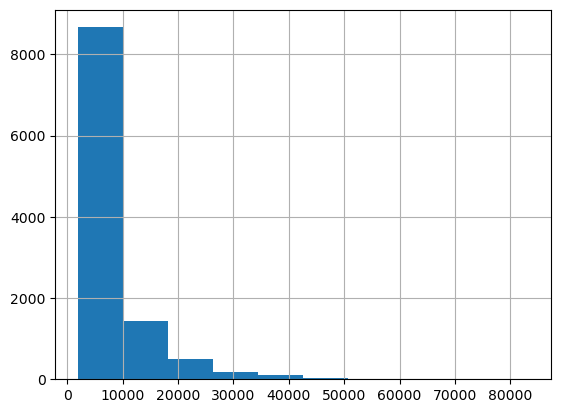

In [210]:
numericals_df["customer_lifetime_value"].hist()

<Axes: >

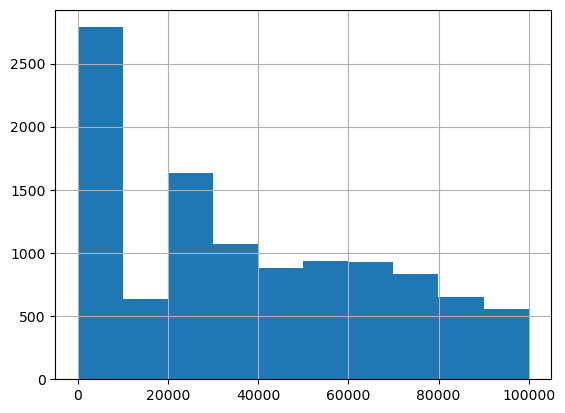

In [212]:
numericals_df["income"].hist()

<Axes: >

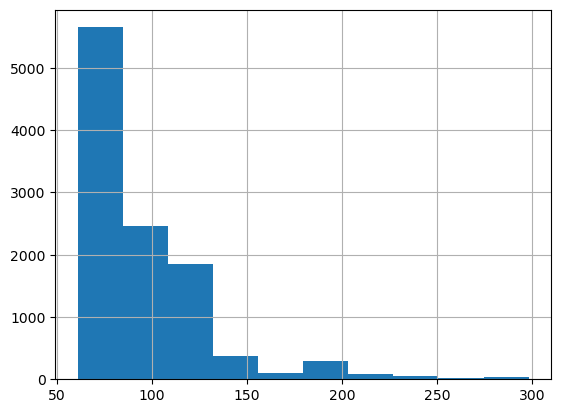

In [213]:
numericals_df["monthly_premium_auto"].hist()

<Axes: >

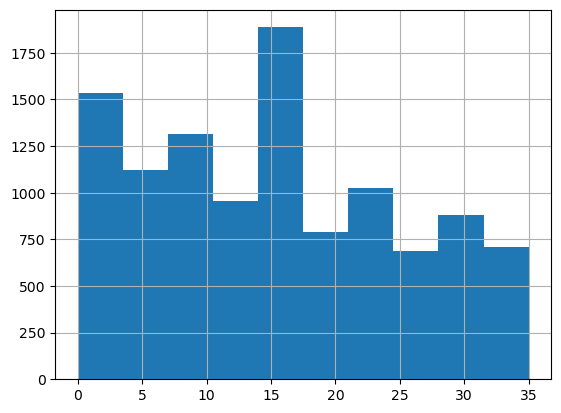

In [214]:
numericals_df["months_since_last_claim"].hist()

<Axes: >

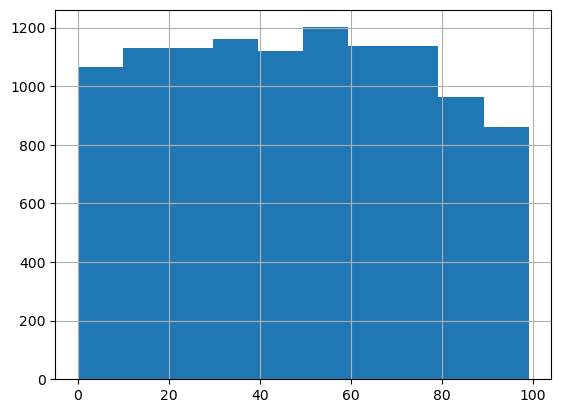

In [215]:
numericals_df["months_since_policy_inception"].hist()

<Axes: >

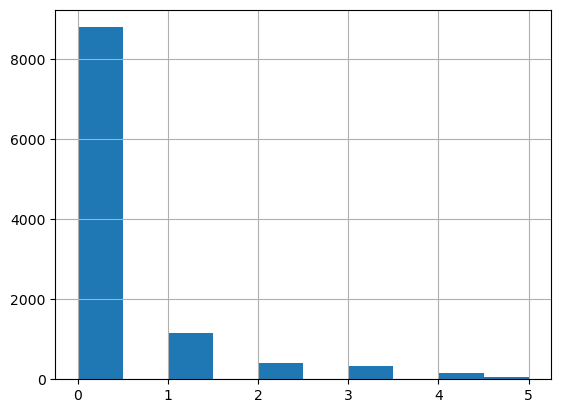

In [216]:
 numericals_df["number_of_open_complaints"].hist()

<Axes: >

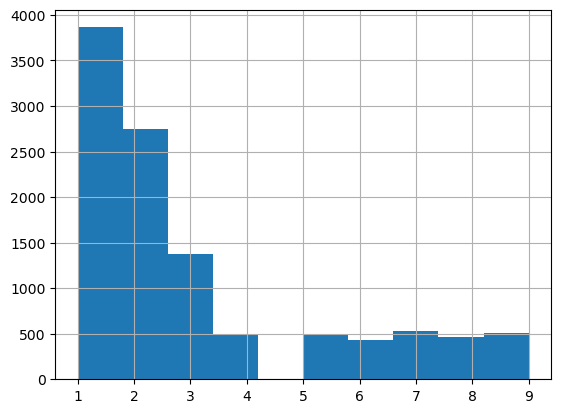

In [217]:
 numericals_df["number_of_policies"].hist()

<Axes: >

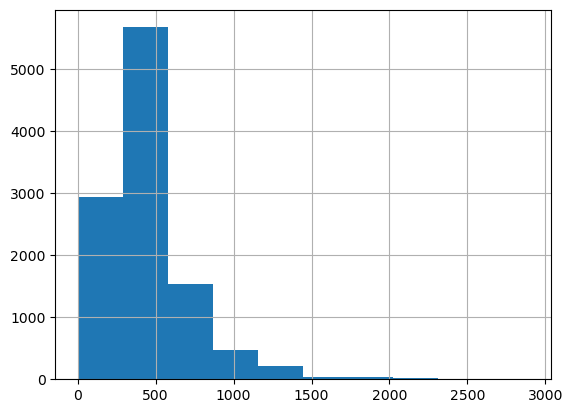

In [218]:
 numericals_df["total_claim_amount"].hist()

In [229]:
# varA
# Use minmax transform to bring varA's values into the range [0,1].
# Check that varA has been rescaled using a displot or a histogram

In [230]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
scaler = MinMaxScaler()

In [231]:
numericals_df["cltv_minmax"] = scaler.fit_transform(numericals_df[["customer_lifetime_value"]])

<Axes: >

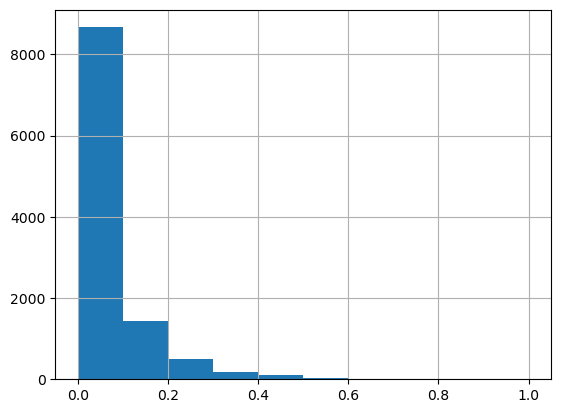

In [227]:
numericals_df["cltv_minmax"].hist()

In [ ]:
# varB 
# Use StandardScaler to standardize the variable or PowerTransform to reduce its skew.
# Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

In [232]:
scaler = StandardScaler()

In [233]:
numericals_df["mpa_standard"] = scaler.fit_transform(numericals_df[["monthly_premium_auto"]])

<Axes: >

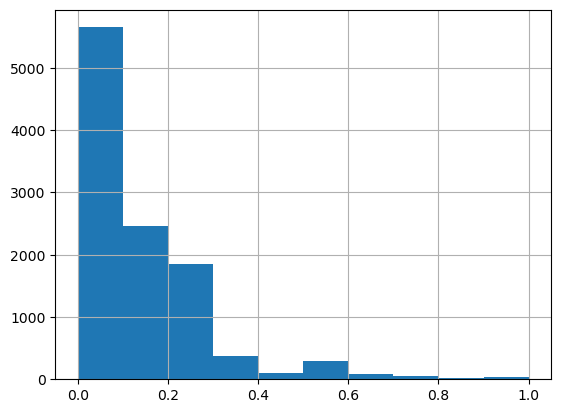

In [235]:
numericals_df["mpa_standard"].hist()

In [236]:
numericals_df["mpa_standard"].describe()

count    10910.000000
mean         0.135848
std          0.145327
min          0.000000
25%          0.029536
50%          0.092827
75%          0.202532
max          1.000000
Name: mpa_standard, dtype: float64

In [237]:
pt = PowerTransformer()

In [238]:
numericals_df["mpa_pt"] = pt.fit_transform(numericals_df[["monthly_premium_auto"]])

<Axes: >

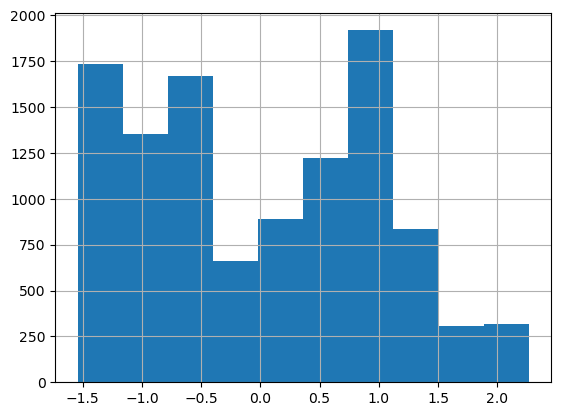

In [239]:
numericals_df["mpa_pt"].hist()

In [242]:
numericals_df["mpa_pt"].describe()

count    1.091000e+04
mean     2.450089e-13
std      1.000046e+00
min     -1.542363e+00
25%     -9.236036e-01
50%     -1.301795e-02
75%      8.729325e-01
max      2.265286e+00
Name: mpa_pt, dtype: float64